In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image_names = ["2007_000068", "2007_000121", "2007_000123"]
voc_ext = ".jpg"
gt_ext = ".png"

voc_dir = "data/voc12/"
gt_dir = "data/gt/"

images = []
gt_images = []

images_gray = []

for name in image_names:
    img = cv2.imread(voc_dir + name + voc_ext)
    gt = cv2.imread(gt_dir + name + gt_ext)
   
    images.append(img)
    gt_images.append(gt)

    images_gray.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

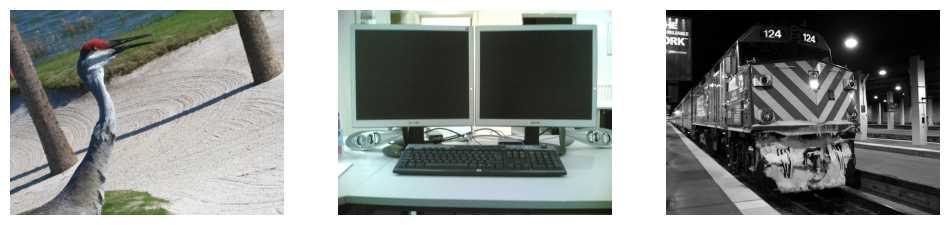

In [39]:
fig = plt.figure(figsize=(12, 4))

rows = 1
cols = 3

for i, img in enumerate(images):
    fig.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(img[:,:,::-1])

## Thresholding

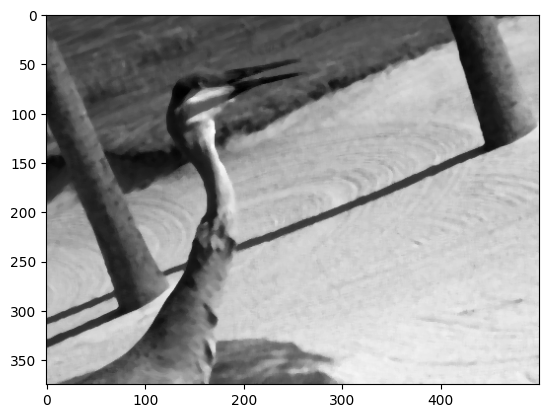

In [40]:
blurred = cv2.medianBlur(images_gray[0], 5)
plt.imshow(blurred, cmap="gray")

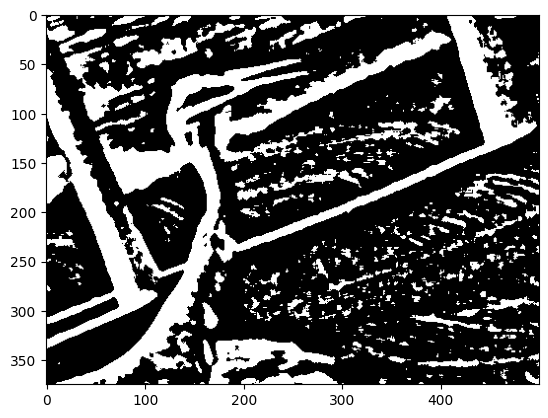

In [41]:
bin_img = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 5)
plt.imshow(bin_img, cmap="gray")

In [194]:
blurred = cv2.GaussianBlur(images[0], (11,11), 0)
lab_img = cv2.cvtColor(blurred, cv2.COLOR_BGR2Lab)

superpixels = cv2.ximgproc.createSuperpixelSLIC(lab_img, algorithm=cv2.ximgproc.SLIC, region_size=30)

In [195]:
superpixels.getNumberOfSuperpixels()

221

In [196]:
superpixels.iterate()

In [197]:
img = superpixels.getLabelContourMask()
img.shape

(375, 500)

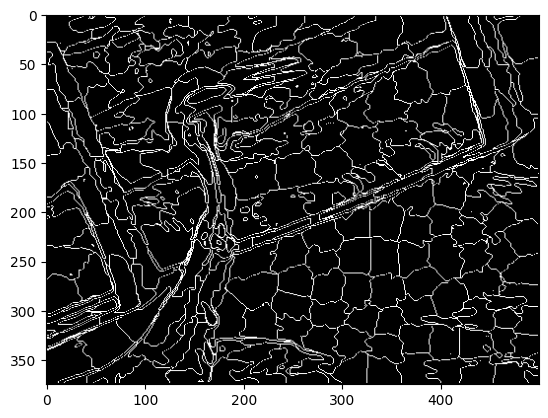

In [198]:
plt.imshow(img, cmap="gray")